<h1 align='center'> 영상처리 프로그래밍 실습 2</h1>

<h6 align='right'> 2022. 3. 17.</h6>

<div class="alert alert-block alert-info">
    
- 파일 이름에서 00000000을 자신의 학번으로, name을 자신의 이름으로 수정하세요.

- 다음 줄에 자신의 이름, 학번, 학과(전공)을 적으세요.

* 이름: 김성문   &nbsp;&nbsp;          학번: 20175115   &nbsp;&nbsp;         학과(전공): 빅데이터 전공
    
</div>

- JupyterLab 문서의 최신 버전은 [JupyterLab Documentation](https://jupyterlab.readthedocs.io/en/stable/index.html#/)을  참고하라

- Markdown은 [Markdown Guide](https://www.markdownguide.org/)를 참고하라.
- [Markdown Cheat Sheet](https://www.markdownguide.org/cheat-sheet/)

* 제출 마감: 3월 23일 (수) 오후 6:00까지 최종본 SmartLEAD제출


In [3]:
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

import numpy as np
print("OpenCV version", cv2.__version__)
print("NumPy version", np.__version__)

OpenCV version 4.5.2
NumPy version 1.20.3


## 영상 읽기

### OpenCV의 imread() 로 읽기

#### PNG 파일 읽기

In [3]:
img_bird_png = cv2.imread('bird.png')

####  영상 데이터의 속성 확인하기

In [4]:
type(img_bird_png)  # ndarray: n-dimensional array (다차원 배열)

numpy.ndarray

In [5]:
img_bird_png.shape  # tuple로 반환 (높이, 너비, BGR)

(425, 640, 3)

In [6]:
img_bird_png.dtype  # 'uint8': unsigned integer 8-bits (RGB는 24비트 필요)

dtype('uint8')

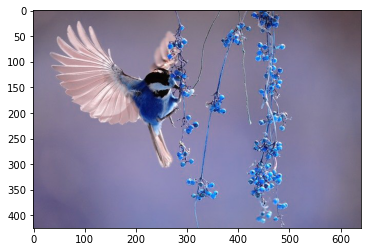

In [7]:
plt.imshow(img_bird_png)    # BGR순서이기 때문에 색이 다름

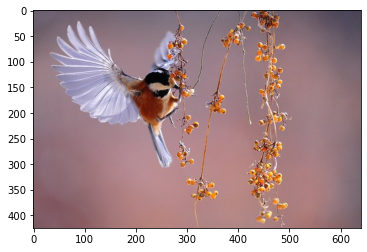

In [8]:
plt.imshow(img_bird_png[:,:,::-1])  # 반대로 했기 때문에 정상적으로 이미지가 나옴

In [9]:
help(cv2.imread)

Help on built-in function imread:

imread(...)
    imread(filename[, flags]) -> retval
    .   @brief Loads an image from a file.
    .   
    .   @anchor imread
    .   
    .   The function imread loads an image from the specified file and returns it. If the image cannot be
    .   read (because of missing file, improper permissions, unsupported or invalid format), the function
    .   returns an empty matrix ( Mat::data==NULL ).
    .   
    .   Currently, the following file formats are supported:
    .   
    .   -   Windows bitmaps - \*.bmp, \*.dib (always supported)
    .   -   JPEG files - \*.jpeg, \*.jpg, \*.jpe (see the *Note* section)
    .   -   JPEG 2000 files - \*.jp2 (see the *Note* section)
    .   -   Portable Network Graphics - \*.png (see the *Note* section)
    .   -   WebP - \*.webp (see the *Note* section)
    .   -   Portable image format - \*.pbm, \*.pgm, \*.ppm \*.pxm, \*.pnm (always supported)
    .   -   PFM files - \*.pfm (see the *Note* section)
    .   -   

- argument로 cv2.IMREAD_UNCHANGED 추가

In [10]:
help(cv2.imread)

Help on built-in function imread:

imread(...)
    imread(filename[, flags]) -> retval
    .   @brief Loads an image from a file.
    .   
    .   @anchor imread
    .   
    .   The function imread loads an image from the specified file and returns it. If the image cannot be
    .   read (because of missing file, improper permissions, unsupported or invalid format), the function
    .   returns an empty matrix ( Mat::data==NULL ).
    .   
    .   Currently, the following file formats are supported:
    .   
    .   -   Windows bitmaps - \*.bmp, \*.dib (always supported)
    .   -   JPEG files - \*.jpeg, \*.jpg, \*.jpe (see the *Note* section)
    .   -   JPEG 2000 files - \*.jp2 (see the *Note* section)
    .   -   Portable Network Graphics - \*.png (see the *Note* section)
    .   -   WebP - \*.webp (see the *Note* section)
    .   -   Portable image format - \*.pbm, \*.pgm, \*.ppm \*.pxm, \*.pnm (always supported)
    .   -   PFM files - \*.pfm (see the *Note* section)
    .   -   

In [11]:
img_bird_png_u = cv2.imread('bird.png', cv2.IMREAD_UNCHANGED)   # alpha 채널까지 불러옴

In [5]:
def print_array_attributes(img):
    print(f'shape: {img.shape}')
    print(f'dtype: {img.dtype}')
    print(f'min, max: {img.min()}, {img.max()}')

In [13]:
print_array_attributes(img_bird_png)

shape: (425, 640, 3)
dtype: uint8
min, max: 0, 255


In [14]:
print_array_attributes(img_bird_png_u)  # B, G, R, alpha(투명도)

shape: (425, 640, 4)
dtype: uint8
min, max: 0, 255


#### PNG 파일을 JPEG 파일로 저장하기

In [15]:
cv2.imwrite('bird.jpg', img_bird_png_u)

True

#### JPEG 파일 읽기

In [16]:
file_name = 'bird.jpg'

- 영상 데이터의 속성 확인하기

In [17]:
img_bird_jpg = cv2.imread(file_name)

In [18]:
print_array_attributes(img_bird_jpg)

shape: (425, 640, 3)
dtype: uint8
min, max: 0, 255


In [19]:
img_bird_jpg_u = cv2.imread(file_name, cv2.IMREAD_UNCHANGED)

In [20]:
print_array_attributes(img_bird_jpg_u)  # alpha 채널은 jpg에서 지원 X

shape: (425, 640, 3)
dtype: uint8
min, max: 0, 255


#### JPEG 파일의 영상 데이터 배열의 컬러 채널이 3개뿐인 이유

**설명**: jpg에서는 alpha 채널을 지원하지 않기 때문

### Matplotlib.image의 imread() 로 읽기

#### JPEG 파일 읽기

In [1]:
file_name = 'bird.jpg'

In [6]:
img_bird_jpg_mp = mpimg.imread(file_name)
print_array_attributes(img_bird_jpg_mp)

shape: (425, 640, 3)
dtype: uint8
min, max: 0, 255


In [7]:
img_bird_jpg[0,0]   # BGR

NameError: name 'img_bird_jpg' is not defined

In [8]:
img_bird_jpg_mp[0,0]  # RGB

array([103,  92, 108], dtype=uint8)

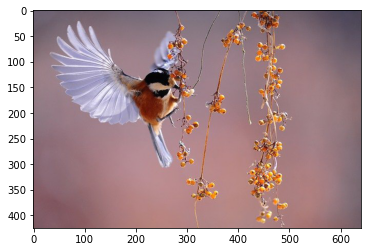

In [14]:
plt.imshow(img_bird_jpg_mp)

- 두 NumPy ndarray가 같은지 확인하기

In [26]:
img_bird_jpg[0,:,:] == img_bird_jpg_mp[0,:,::-1]

array([[ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True],
       ...,
       [ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True]])

In [27]:
a = np.array([[1,2,3], [4,5,6]])
a

array([[1, 2, 3],
       [4, 5, 6]])

In [28]:
b = np.array([[1,2,3], [4,5,6]])
a == b

array([[ True,  True,  True],
       [ True,  True,  True]])

In [29]:
a[1][2], a[1,2]

(6, 6)

In [30]:
a[1,0:2]    # index slicing
a[1,::-1]

array([6, 5, 4])

#### PNG 파일 읽기

In [31]:
file_name = 'bird.png'

In [32]:
img_bird_png_mp = mpimg.imread(file_name)

- 영상의 속성 확인하기

In [33]:
print_array_attributes(img_bird_png_mp)  # 별 다른 조건 없이 alpha채널을 읽음
# 최소 최대값을 강제적으로 0과 1로 바뀜

shape: (425, 640, 4)
dtype: float32
min, max: 0.0, 1.0


### List 객체의 데이터 복사하기



In [34]:
x = [1, 3, 5, 7, 9]
x

[1, 3, 5, 7, 9]

In [77]:
type(x)

list

- index를 통해서 개별 item에 접근
  - positive index: 0, 1, 2, 3, 4
  - negative index: -5, -4, -3, -2, -1

In [36]:
x[1], x[-4]

(3, 3)

- index slicing

In [37]:
x[:]

[1, 3, 5, 7, 9]

In [38]:
x[:3]

[1, 3, 5]

In [39]:
x[1:]

[3, 5, 7, 9]

In [40]:
x[::2]   # 2씩 건너뜀

[1, 5, 9]

In [41]:
x[::-1]   # 역순

[9, 7, 5, 3, 1]

In [42]:
x[0] = 'str'
x

['str', 3, 5, 7, 9]

#### List 더하기

In [78]:
x, y

([[1, 2, 3, 4, 5], [6, 7, 8, 9, 10]], [[1, 2, 3, 4, 5], [6, 7, 8, 9, 10]])

In [79]:
x = [1, 3, 5]
y = [2, 4, 6]
x + y

[1, 3, 5, 2, 4, 6]

In [80]:
3 * x

[1, 3, 5, 1, 3, 5, 1, 3, 5]

### Nested list

In [44]:
x = [[1, 2, 3, 4, 5], [6, 7, 8, 9, 10]]
x

[[1, 2, 3, 4, 5], [6, 7, 8, 9, 10]]

In [45]:
y = [[0,0,0,0,0], [0,0,0,0,0]]
y

[[0, 0, 0, 0, 0], [0, 0, 0, 0, 0]]

- x의 각 item에 10을 더해서 y의 대응하는 item에 할당하라

In [46]:
for i in range(2):
    for j in range(5):
        y[i][j] = x[i][j] + 10
y

[[11, 12, 13, 14, 15], [16, 17, 18, 19, 20]]

### NumPy ndarray 복사하기

In [47]:
a1 = np.array([1, 3, 5])
a1

array([1, 3, 5])

In [48]:
a1.shape

(3,)

In [49]:
a1[1] = 5
a1

array([1, 5, 5])

In [50]:
a1[1] = 'str'   # nparray는 똑같은 데이터 타입만 사용가능

ValueError: invalid literal for int() with base 10: 'str'

In [51]:
a1[1] = 4.8    # 정수로 바뀌어서 들어감(소수점 버림)
a1

array([1, 4, 5])

In [52]:
a1.dtype

dtype('int32')

In [53]:
a1[1] = -5
a1

array([ 1, -5,  5])

In [54]:
a2 = np.array([1,3,5], np.uint8)
a2

array([1, 3, 5], dtype=uint8)

unsigned integer 8-bit 데이터는 0부터 255($2^8-1$)까지의 정수만 표현

In [55]:
a2[0] = 257
a2[0] = -1
a2

array([255,   3,   5], dtype=uint8)

**설명**: overflow와 underflow

### NumPy ndarray 배열 객체의 연산

In [56]:
a2 + a2  # 각각의 원소끼리 덧셈 연산

array([254,   6,  10], dtype=uint8)

### NumPy ndarray 배열 연산의 broadcasting

In [57]:
a2 + 2   # 모든 원소에 적용

array([1, 5, 7], dtype=uint8)

In [58]:
a2 * 3

array([253,   9,  15], dtype=uint8)

In [59]:
a3 = a2 / 2
a3.dtype      # unsinged int -> float로 바뀜

dtype('float64')

In [60]:
a4 = a2 // 2
a4.dtype

dtype('uint8')

In [61]:
a4

array([127,   1,   2], dtype=uint8)

### 영상 복사하기

1) OpenCV의 imread() 함수를 이용해서 tree-1.jpg 파일을 읽어서 ndarray를 img_tree_1 변수에 할당한다.

In [62]:
img_tree_1 = cv2.imread('tree-1.jpg')

2) img_tree_1을 복사할 빈 ndarray img를 만든다.

In [63]:
img_tree_1.shape

(426, 640, 3)

In [64]:
img = np.zeros(img_tree_1.shape, img_tree_1.dtype)

In [65]:
img = np.zeros_like(img_tree_1) # 같은 타입 0으로 채움

In [66]:
img = np.empty_like(img_tree_1)

3) img_tree_1의 모든 pixel을 img의 같은 위치에 복사한다.

In [67]:
img[:,:,:] = img_tree_1[:,:,:]

In [68]:
img = img_tree_1.copy()

In [69]:
img = img_tree_1   # 주소를 그대로 할당한다(같은 객체를 가르킴)

### weighted sum of two images

$$g(x,y) = \alpha f_1(x,y) + (1-\alpha )f_2(x,y), \;\; 0 \le \alpha \le 1$$

In [1]:
img_tree_1 = cv2.imread('tree-1.jpg')
img_tree_2 = cv2.imread('tree-2.jpg')
img_tree_3 = cv2.imread('tree-3.jpg')
img_tree_4 = cv2.imread('tree-4.jpg')

NameError: name 'cv2' is not defined

In [71]:
for alpha in np.arange(0, 1.1, 0.1):
    img_tree = (img_tree_1 * alpha + img_tree_4 * (1-alpha)).astype(np.uint8)
    cv2.imshow("Tree images", img_tree)
    cv2.waitKey(0)
cv2.destroyAllWindows()

In [89]:
help(cv2.waitKey)

Help on built-in function waitKey:

waitKey(...)
    waitKey([, delay]) -> retval
    .   @brief Waits for a pressed key.
    .   
    .   The function waitKey waits for a key event infinitely (when \f$\texttt{delay}\leq 0\f$ ) or for delay
    .   milliseconds, when it is positive. Since the OS has a minimum time between switching threads, the
    .   function will not wait exactly delay ms, it will wait at least delay ms, depending on what else is
    .   running on your computer at that time. It returns the code of the pressed key or -1 if no key was
    .   pressed before the specified time had elapsed.
    .   
    .   @note
    .   
    .   This function is the only method in HighGUI that can fetch and handle events, so it needs to be
    .   called periodically for normal event processing unless HighGUI is used within an environment that
    .   takes care of event processing.
    .   
    .   @note
    .   
    .   The function only works if there is at least one HighGUI window

## 문제 1.

가중치 $\alpha$를 1부터 0까지 0.01 간격으로 변경해 가면서, 4 영상의 weighted sum을 구하고 화면에 표시하는 프로그램을 작성하라.

영상의 순서는 tree-1 --> tree-2 --> tree-3 --> tree-4 --> tree-1
단, 영상과 영상 사이의 디스플레이 간격은 0.5초로 설정하라.

In [17]:
img_tree_1 = cv2.imread('tree-1.jpg')[:,:,::-1]
img_tree_2 = cv2.imread('tree-2.jpg')[:,:,::-1] 
img_tree_3 = cv2.imread('tree-3.jpg')[:,:,::-1]
img_tree_4 = cv2.imread('tree-4.jpg')[:,:,::-1]

In [ ]:
winname = "Weighted Sum of images"
cv2.imshow(winname, img_tree1)
cv2.waitKey(0)

images = [img_tree1, img_tree2, img_tree3, img_tree4, img_tree1]
for n in range(len(images)-1):
    for alpha in np.arange(0., 1.0, 0.01):
        img = ((1-alpha)*images[n] + alpha*images[n+1]).astype(np.unit8)
        cv2.imshow(winname, img)
        cv2.waitKey(10)

cv2.destroyAllWindows()